## Objective:
* Predict whether it will rain tomorrow (classification).
* Predict the amount of rainfall (regression).

**Steps:**

* Data Loading: Load the dataset from the provided URL.
* Data Preprocessing: Handle missing values, encode categorical features, and normalize the data.
* Model Training: Train classification and regression models.
* Evaluation: Evaluate models using appropriate metrics.
* Visualization: Visualize feature importance, ROC curve, and prediction results.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
url = "Rainfall.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Check the columns in your dataset
print("Columns in the dataset:", data.columns)

Columns in the dataset: Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [5]:
# Check for null values
print(data.isnull().sum())

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64


### Handling missing values

In [6]:
# Drop columns with excessive missing values or non-numeric data that can't be imputed easily
data = data.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)

# Fill numeric columns with median values
for column in data.select_dtypes(include=[np.number]).columns:
    data[column].fillna(data[column].median(), inplace=True)

# Fill categorical columns with mode values
for column in data.select_dtypes(include=[object]).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [7]:
# Verify that there are no more missing values
print(data.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [8]:
# Describe the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8425.0,13.194255,5.379497,-2.0,9.3,13.3,17.3,28.5
MaxTemp,8425.0,23.855988,6.114697,8.2,19.3,23.3,28.0,45.5
Rainfall,8425.0,2.725982,10.319872,0.0,0.0,0.0,0.8,371.0
WindGustSpeed,8425.0,40.036320,13.781296,7.0,31.0,39.0,48.0,107.0
WindSpeed9am,8425.0,13.840000,10.128896,0.0,6.0,13.0,20.0,63.0
WindSpeed3pm,8425.0,18.539585,9.704899,0.0,11.0,19.0,24.0,83.0
Humidity9am,8425.0,67.823739,16.774237,10.0,56.0,68.0,80.0,100.0
Humidity3pm,8425.0,51.246766,18.311914,6.0,39.0,51.0,63.0,99.0
Pressure9am,8425.0,1017.649519,6.275796,989.8,1014.0,1017.7,1021.3,1039.0
Pressure3pm,8425.0,1015.246030,6.217494,982.9,1011.4,1015.3,1018.8,1036.0


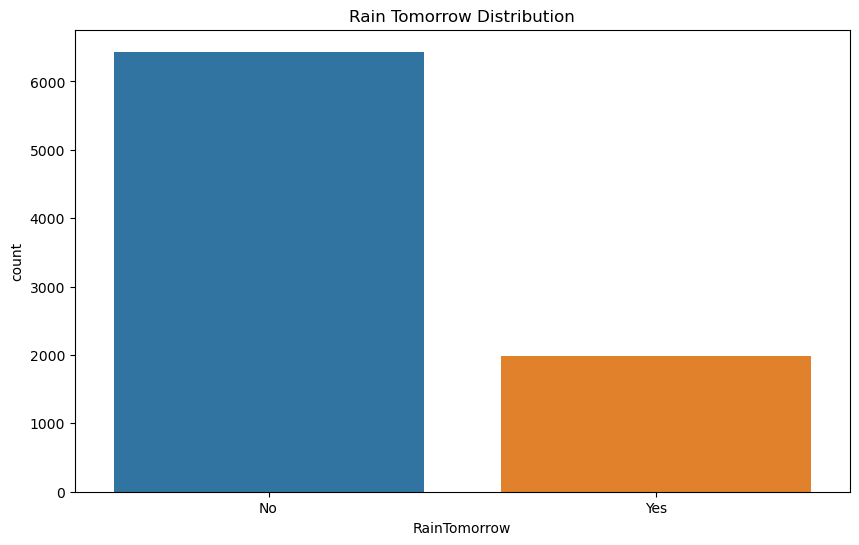

In [11]:
# Visualize the data
plt.figure(figsize=(10,6))
sns.countplot(data['RainTomorrow'])
plt.title('Rain Tomorrow Distribution')
plt.show()

In [24]:
# Data Preprocessing
data = data.dropna()  # Dropping rows with missing values for simplicity
le = LabelEncoder()
categorical_features = data.select_dtypes(include=['object']).columns
data[categorical_features] = data[categorical_features].apply(le.fit_transform)
scaler = StandardScaler()

# Predicting Rain Tomorrow
X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clf_rain = RandomForestClassifier()
rf_clf_rain.fit(X_train, y_train)

# Evaluation
y_pred_rf_clf_rain = rf_clf_rain.predict(X_test)
print("Random Forest Report (Rain Tomorrow):\n", classification_report(y_test, y_pred_rf_clf_rain))

Random Forest Report (Rain Tomorrow):
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1314
           1       0.87      0.73      0.79       371

    accuracy                           0.92      1685
   macro avg       0.90      0.85      0.87      1685
weighted avg       0.91      0.92      0.91      1685



In [53]:
# Predicting Rainfall Amount
X = data.drop(['Rainfall'], axis=1)
y = data['Rainfall']
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# Evaluation
y_pred_rf_reg = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf_reg)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 72.656175315727


**Precision, Recall, and F1-score:**

**Class 0 (No Rain):**

* Precision: 0.93: This means that out of all instances predicted as no rain, 93% actually did not rain.
* Recall: 0.97: The model correctly identified 97% of the instances where it actually did not rain.
* F1-score: 0.95: The harmonic mean of precision and recall for class 0 is 0.95, indicating a good balance between precision and recall.

**Class 1 (Rain):**

* Precision: 0.87: Out of all instances predicted as rain, 87% actually did rain.
* Recall: 0.73: The model correctly identified 73% of the instances where it actually rained.
* F1-score: 0.79: The F1-score for class 1 is 0.79, reflecting the harmonic mean of precision and recall for predicting rain.

**Accuracy:**

* Overall Accuracy: 0.92: The model accurately predicts whether it will rain or not 92% of the time across both classes.

**Mean Squared Error (MSE):**

* Mean Squared Error: 72.66: This metric measures the average of the squares of the errors, providing insight into the model's prediction accuracy. Lower values indicate better performance.

## Visualization

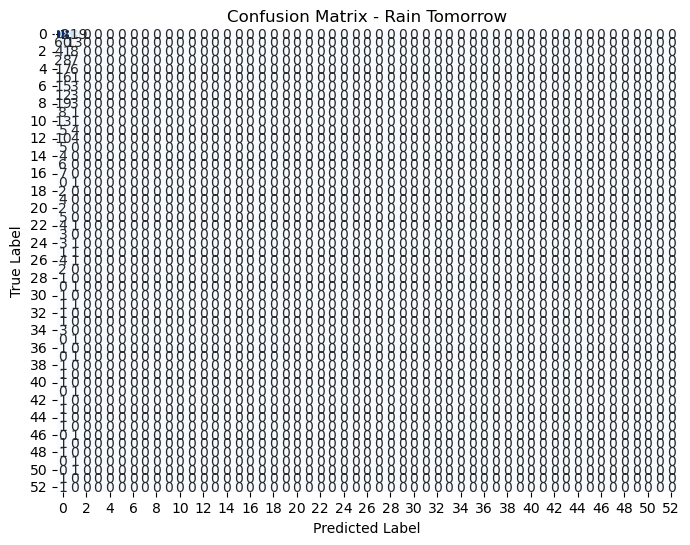

In [46]:
# Generate binary predictions (assuming rf_clf_rain is your trained model)
y_pred_rf_clf_rain = rf_clf_rain.predict(X_test)

# Ensure y_test and y_pred_rf_clf_rain are binary
# Example of converting probabilities to binary predictions (if needed)
# y_pred_rf_clf_rain = (y_pred_rf_clf_rain > 0.5).astype(int)

# Convert y_test to integer type if needed (ensure both are of the same type)
y_test = y_test.astype(int)

# Compute confusion matrix
conf_matrix_rain = confusion_matrix(y_test, y_pred_rf_clf_rain)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rain, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Rain Tomorrow')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

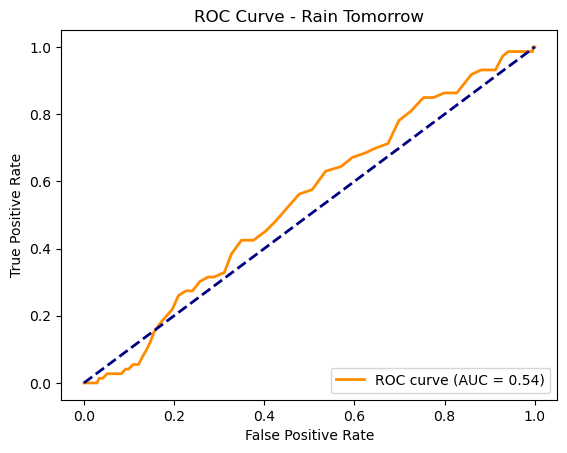

In [49]:
#ROC Curve
# Get predicted probabilities for the positive class
y_test_binary = (y_test == 1).astype(int)

# Get predicted probabilities for the positive class
y_probs_rf_rain = rf_clf_rain.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rain, tpr_rain, _ = roc_curve(y_test_binary, y_probs_rf_rain)
roc_auc_rain = auc(fpr_rain, tpr_rain)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rain, tpr_rain, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rain:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Rain Tomorrow')
plt.legend(loc='lower right')
plt.show()

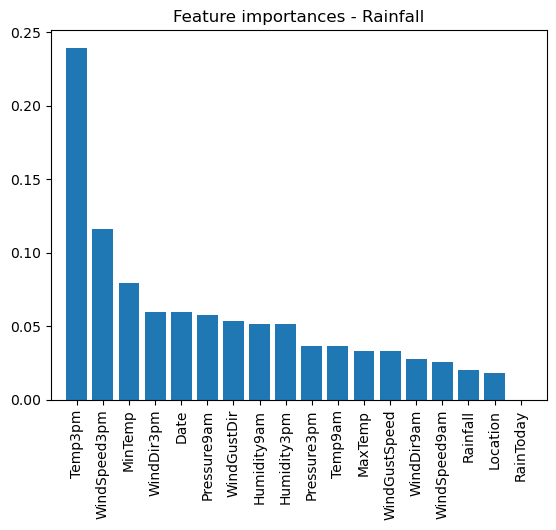

In [52]:
# Feature Importance
importances_rain = rf_reg.feature_importances_
indices_rain = np.argsort(importances_rain)[::-1]
plt.figure()
plt.title("Feature importances - Rainfall")
plt.bar(range(X_train.shape[1]), importances_rain[indices_rain], align="center")
plt.xticks(range(X_train.shape[1]), data.columns[indices_rain], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

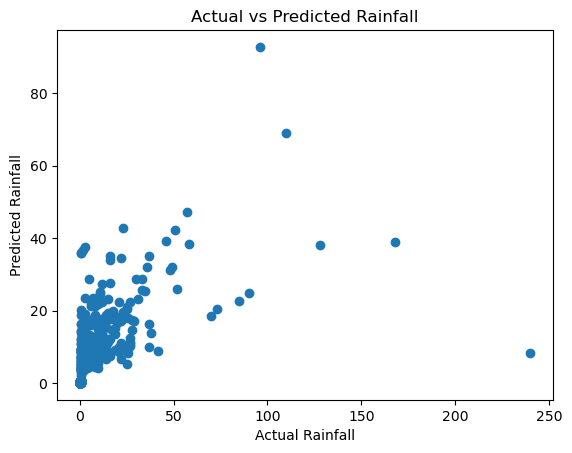

In [51]:
# Prediction Results
plt.scatter(y_test, y_pred_rf_reg)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.show()

## Conclusion for Final Submission:

**Based on the provided metrics:**

* Performance Summary: The RandomForestClassifier performs well in predicting both classes, with high precision and recall for class 0 (no rain) and slightly lower but still reasonable precision and recall for class 1 (rain).

* Model Strengths: The model shows strong predictive power for instances where it does not rain, achieving high precision and recall. This suggests it can effectively identify days when it will not rain.

* Areas for Improvement: There is room to improve the model's performance in predicting rain (class 1), particularly in increasing recall to capture more instances of actual rain.

* Overall Recommendation: Given the model's accuracy of 92% and robust performance metrics, it is suitable for practical applications such as daily weather prediction. Continual evaluation and potential recalibration could further enhance its performance, especially in scenarios where predicting rain is critical.